# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [10]:
# Extract all rows of data
data_rows = soup.find_all('tr', class_="data-row")
data_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in data_rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if cols:
        data_list.append(cols)

In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
scraped_df = pd.DataFrame(data_list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [22]:
# Confirm DataFrame was created successfully
scraped_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
scraped_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [33]:
# Change data types for data analysis
scraped_df['id'] = pd.to_numeric(scraped_df['id'])
scraped_df['terrestrial_date'] = pd.to_datetime(scraped_df['terrestrial_date'])
scraped_df['sol'] = scraped_df['sol'].astype('int32')
scraped_df['ls'] = scraped_df['ls'].astype('int32')
scraped_df['month'] = scraped_df['month'].astype('int32')
scraped_df['min_temp'] = scraped_df['min_temp'].astype(float)
scraped_df['pressure'] = scraped_df['pressure'].astype(float)


In [37]:
# Confirm type changes were successful by examining data types again
scraped_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
scraped_df['month'].max()

12

In [41]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = scraped_df['sol'].nunique()
num_sols

1867

In [45]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = scraped_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

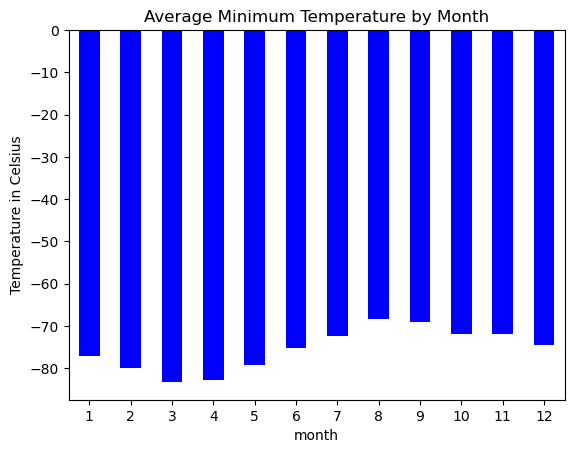

In [51]:
# Plot the average minimum temperature by month
plt.figure()
avg_min_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
plt.show()

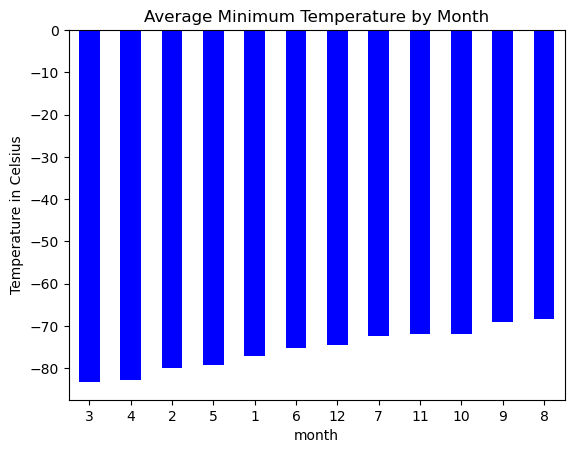

The coldest month is 3 with an average minimum temperature of -83.30729166666667.
The hottest month is 8 with an average minimum temperature of -68.38297872340425.


In [55]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

plt.figure()
sorted_avg_min_temp.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
plt.show()

coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()

coldest_temp = sorted_avg_min_temp.min()
hottest_temp = sorted_avg_min_temp.max()

print(f"The coldest month is {coldest_month} with an average minimum temperature of {coldest_temp}.")
print(f"The hottest month is {hottest_month} with an average minimum temperature of {hottest_temp}.")

In [59]:
# 4. What is the average pressure by month?
average_pressure_by_month = scraped_df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

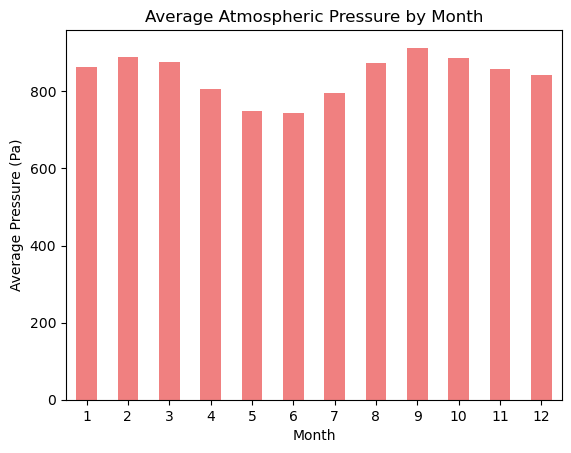

In [61]:
# Plot the average pressure by month
plt.figure()
average_pressure_by_month.plot(kind='bar', color='lightcoral')
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

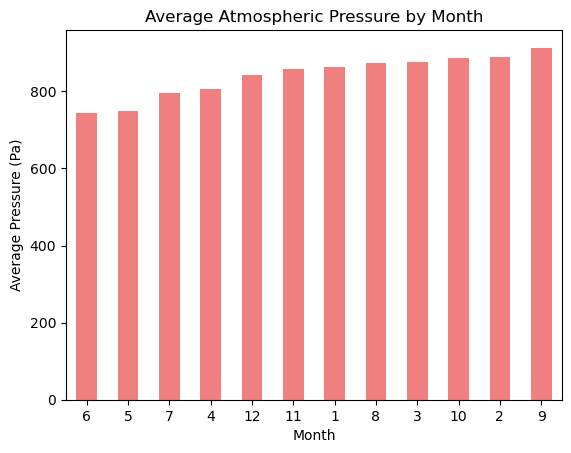

The month with the lowest pressure is 6 with an average pressure of 745.0544217687075 Pa.
The month with the highest pressure is 9 with an average pressure of 913.3059701492538 Pa.


In [65]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sort_pressure_months = average_pressure_by_month.sort_values()
plt.figure()
sort_pressure_months.plot(kind='bar', color='lightcoral')
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

lowest_pressure_month = sort_pressure_months.idxmin()
highest_pressure_month = sort_pressure_months.idxmax()

lowest_pressure = sort_pressure_months.min()
highest_pressure = sort_pressure_months.max()

print(f"The month with the lowest pressure is {lowest_pressure_month} with an average pressure of {lowest_pressure} Pa.")
print(f"The month with the highest pressure is {highest_pressure_month} with an average pressure of {highest_pressure} Pa.")

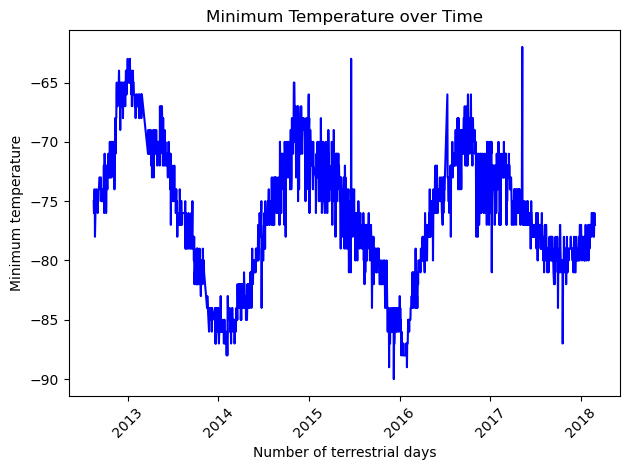

In [75]:
terrestrial_df = scraped_df.sort_values('terrestrial_date')
plt.figure()
plt.plot(terrestrial_df['terrestrial_date'], terrestrial_df['min_temp'], linestyle='-', color='blue')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

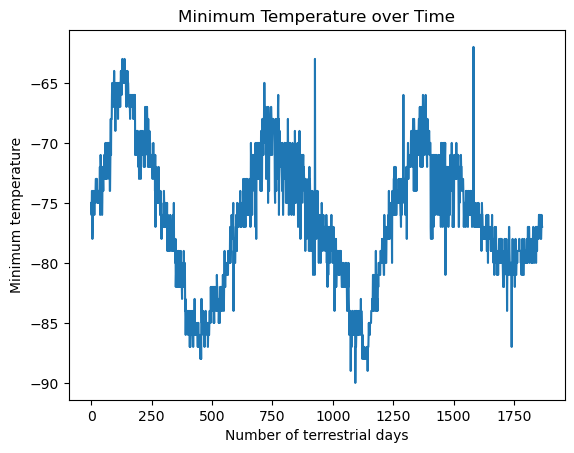

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
terrestrial_df = df.sort_values('terrestrial_date')
plt.figure()
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='blue')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

#### Minimum Temperature
The coldest month is 3 with an average minimum temperature of -83.30729166666667.
The hottest month is 8 with an average minimum temperature of -68.38297872340425.


#### Atmospheric Pressure

The month with the lowest pressure is 6 with an average pressure of 745.0544217687075 Pa.
The month with the highest pressure is 9 with an average pressure of 913.3059701492538 Pa.

#### Year Length

Looking at the cycle of the peaks, we can estimate a Martian year to be around 500-750 days. The known value is approximately 687, so a range of 515-859 days would reflect 25% variance.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [79]:
# Write the data to a CSV
output_file = "mars_weather_data.csv"
scraped_df.to_csv(output_file, index=False)

In [86]:
browser.quit()